<a href="https://colab.research.google.com/github/Rnaini/Quiz-2/blob/main/Q1b_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [101]:
data = pd.read_csv('/content/dataset_31_credit-g-preprocessed.csv')
data.shape
data.head()

,checking_status=<0,checking_status=0<=X<200,checking_status=>=200,'checking_status=no checking',duration,'credit_history=no credits/all paid','credit_history=all paid','credit_history=existing paid','credit_history=delayed previously','credit_history=critical/other existing credit','purpose=new car','purpose=used car',purpose=furniture/equipment,purpose=radio/tv,'purpose=domestic appliance',purpose=repairs,purpose=education,purpose=vacation,purpose=retraining,purpose=business,purpose=other,credit_amount,savings_status=<100,savings_status=100<=X<500,savings_status=500<=X<1000,savings_status=>=1000,'savings_status=no known savings',employment=unemployed,employment=<1,employment=1<=X<4,employment=4<=X<7,employment=>=7,installment_commitment,'personal_status=male div/sep','personal_status=female div/dep/mar','personal_status=male single','personal_status=male mar/wid','personal_status=female single',other_parties=none,'other_parties=co applicant',other_parties=guarantor,residence_since,'property_magnitude=real estate','property_magnitude=life insurance',property_magnitude=car,'property_magnitude=no known property',age,other_payment_plans=bank,other_payment_plans=stores,other_payment_plans=none,housing=rent,housing=own,'housing=for free',existing_credits,'job=unemp/unskilled non res','job=unskilled resident',job=skilled,'job=high qualif/self emp/mgmt',num_dependents,own_telephone=yes,foreign_worker=no,class
0,1,0,0,0,6,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1169,0,0,0,0,1,0,0,0,0,1,4,0,0,1,0,0,1,0,0,4,1,0,0,0,67,0,0,1,0,1,0,2,0,0,1,0,1,1,0,1
1,0,1,0,0,48,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,5951,1,0,0,0,0,0,0,1,0,0,2,0,1,0,0,0,1,0,0,2,1,0,0,0,22,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0
2,0,0,0,1,12,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,2096,1,0,0,0,0,0,0,0,1,0,2,0,0,1,0,0,1,0,0,3,1,0,0,0,49,0,0,1,0,1,0,1,0,1,0,0,2,0,0,1
3,1,0,0,0,42,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,7882,1,0,0,0,0,0,0,0,1,0,2,0,0,1,0,0,0,0,1,4,0,1,0,0,45,0,0,1,0,0,1,1,0,0,1,0,2,0,0,1
4,1,0,0,0,24,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,4870,1,0,0,0,0,0,0,1,0,0,3,0,0,1,0,0,1,0,0,4,0,0,0,1,53,0,0,1,0,0,1,2,0,0,1,0,2,0,0,0


In [102]:
data.isnull().sum()

checking_status=<0                 0
checking_status=0<=X<200           0
checking_status=>=200              0
'checking_status=no checking'      0
duration                           0
                                  ..
'job=high qualif/self emp/mgmt'    0
num_dependents                     0
own_telephone=yes                  0
foreign_worker=no                  0
class                              0
Length: 62, dtype: int64

In [103]:
y = data['class']
x = data.drop(['class'], axis = 1)

In [104]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x, y, random_state = 0, stratify = y, test_size = 0.2)

In [105]:
y_train.value_counts(normalize= True)

1    0.7
0    0.3
Name: class, dtype: float64

In [106]:
x_train.shape, y_train.shape

((800, 61), (800,))

In [107]:
x_valid.shape, y_valid.shape

((200, 61), (200,))

In [108]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

In [109]:
dt_model = DecisionTreeClassifier(random_state= 1)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [110]:
dt_model.score(x_train, y_train)

1.0

In [111]:
dt_model.score(x_valid, y_valid)

0.725

In [112]:
dt_model.predict(x_valid)

array([0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0])

In [113]:
dt_model.predict_proba(x_valid)

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [114]:
y_pred = dt_model.predict_proba(x_valid)[:,1]
new_y =[]
for i in range(len(y_pred)):
    if y_pred[i]<0.4:
        new_y.append(0)
    else:
        new_y.append(1)

In [115]:
from sklearn.metrics import accuracy_score
accuracy_score(y_valid, new_y)

0.725

In [116]:
from sklearn.metrics import precision_score
precision_score(y_valid, new_y)

0.8294573643410853

In [117]:
from sklearn.metrics import f1_score
f1_score(y_valid, new_y)

0.7955390334572491

In [121]:
from sklearn.metrics import recall_score
recall_score(y_valid, new_y)

0.7642857142857142

In [118]:
#changing max depth
train_accuracy = []
validation_accuracy = []
for depth in range (1,10):
  dt_model = DecisionTreeClassifier(max_depth=depth, random_state=0)
  dt_model.fit(x_train,y_train)
  train_accuracy.append(dt_model.score(x_train,y_train))
  validation_accuracy.append(dt_model.score(x_valid,y_valid))

In [119]:
frame = pd.DataFrame({'max_depth':range(1,10), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame.head()

,max_depth,train_acc,valid_acc
0,1,0.70000,0.700
1,2,0.72625,0.730
2,3,0.73500,0.725
3,4,0.77125,0.715
4,5,0.79625,0.715


No handles with labels found to put in legend.


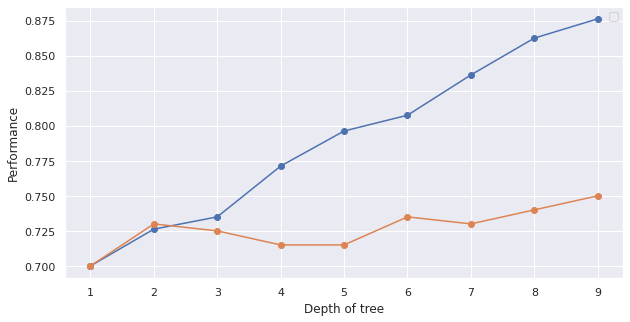

In [120]:
plt.figure(figsize=(10,5))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['valid_acc'], marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('Performance')
plt.legend()